In [3]:
import pickle

In [9]:
out = pickle.load(open('out.pkl','rb'))

In [13]:
import pandas as pd
#./outputs/tweet_hate_movie.txt_120_80_blackbox_100_0.05_2//stats.csv
#fname = '../../out/sent140-normal-trials-greek-backdoor-160b-40g-lr0.005/stats.csv'
fname = '../../out/sent140-normal-trials-backdoor/stats.csv'

#fname = 'pgd_100_0.05_2'
#d1 = '../../outputs/blackbox_100_0.05_2'
#d = '../../outputs/'+fname+'/'
df1 = pd.read_csv(fname)
print(df1.columns)
df1['backdoor_acc_smooth'] = df1.globalModelBackdoorAcc.rolling(window=10, min_periods=1).mean()

Index(['epoch', 'globalModelAcc', 'allNDBS', 'aNDBS', 'aNDAS',
       'globalModelBackdoorAcc'],
      dtype='object')


Index(['epoch', 'globalModelAcc', 'allNDBS', 'aNDBS', 'aNDAS',
       'globalModelBackdoorAcc'],
      dtype='object')


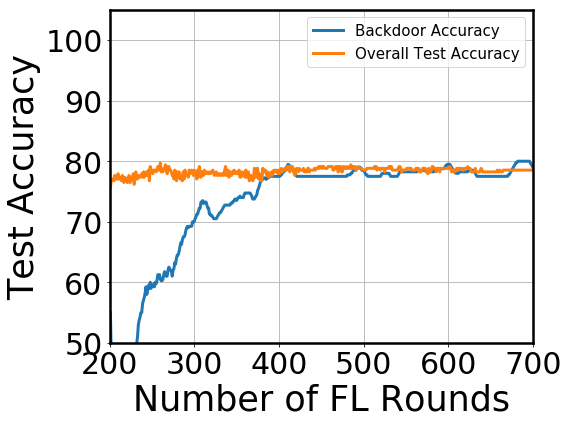

In [4]:
from matplotlib import colors as mcolors
from pylab import *
%matplotlib inline

import pandas as pd
#./outputs/tweet_hate_movie.txt_120_80_blackbox_100_0.05_2//stats.csv
#fname = '../../out/sent140-normal-trials-greek-backdoor-160b-40g-lr0.005/stats.csv'
#fname = '../../out/sent140-normal-trials-backdoor/stats.csv'
fname = '../../out/sent140-normal-trials-greek-backdoor-160b-40g-lr-adapt/stats.csv'
fname ="../../out/sent140-normal-trials-greek-director-backdoor-160b-40g-lr-adapt/stats.csv"
#fname = '../../out/sent140-normal-trials-greek-backdoor-160b-40g-lr-adapt/stats.csv '
#fname = 'pgd_100_0.05_2'
#d1 = '../../outputs/blackbox_100_0.05_2'
#d = '../../outputs/'+fname+'/'
df1 = pd.read_csv(fname)
print(df1.columns)
df1['backdoor_acc_smooth'] = df1.globalModelBackdoorAcc.rolling(window=10, min_periods=1).mean()
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
xmin = df1['epoch'].min()
xmax = df1['epoch'].max()

df1.plot(x='epoch', y='backdoor_acc_smooth', ax=ax, linewidth=3.0, label="Backdoor Accuracy")
#df1.plot(x='epoch', y='globalModelBackdoorAcc', ax=ax, linewidth=3.0, label="Backdoor Accuracy")
#df2.plot(x='fl_iter', y='backdoor_acc_smooth', ax=ax, linewidth=3.0, label="PGD attack")

#df1.plot(x='fl_iter', y='backdoor_acc_smooth', ax=ax, linewidth=3.0, label="PGD like Bbox")

# df3.plot(x='fl_iter', y='backdoor_acc_smooth', ax=ax, linewidth=3.0, label="PGD 1 in 10 projection")
df1.plot(x='epoch', y='globalModelAcc', ax=ax, linewidth=3.0, label="Overall Test Accuracy")
#df2.plot(x='fl_iter', y='main_task_acc', ax=ax, linewidth=3.0, label="Blackbox Raw Task")
#df3.plot(x='fl_iter', y='main_task_acc', ax=ax, linewidth=3.0, label="PGD 1 in 10 Raw Task")

plt.xlabel("Number of FL Rounds",fontsize=35)
plt.ylabel("Test Accuracy",fontsize=35)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylim(50, 105)
plt.xticks(np.arange(xmin-1, xmax+1, 100))
#plt.xlim(xmin, xmax)
#plt.title("M=2 / Southwest")
# plt.title("Green Car attack BBox vs PGD")

legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(25)
ax.xaxis.get_offset_text().set_weight('bold')
ax.legend(prop=legend_properties)
plt.grid()

plt.tight_layout()
plt.savefig('accuracy_greek-director-backdoor-sent140.png', format='png', dpi=100, bbox_inches='tight', pad_inches=0.05)
# plt.savefig("greencar_pgd_vs_bbox.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)


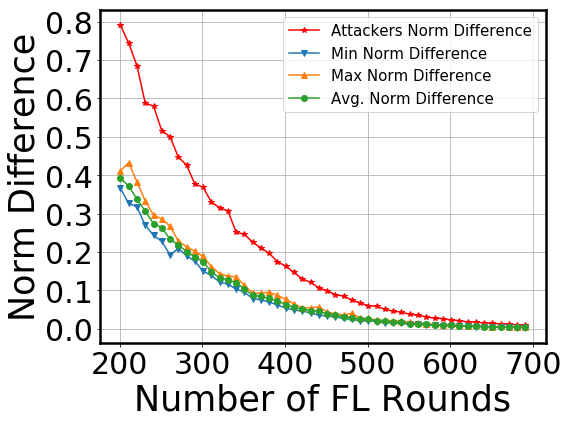

In [30]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
xmin = df1['epoch'].min()
xmax = df1['epoch'].max()
ymin = 0
ymax = 5

allEpochs = np.array(df1['epoch'])
aNDBS = np.array(df1['aNDBS'])
allNDBS = list(df1['allNDBS'])
othersND = []
epochs = []
lst_andbs = []
for i in range(len(aNDBS)):
    if(aNDBS[i]>0):
        s = [float(x) for x in allNDBS[i].split(':')]
        othersND.append([min(s),max(s[1:]),np.mean(s[1:])])
        epochs.append(allEpochs[i])
        lst_andbs.append(aNDBS[i])
#print(othersND)
othersND = np.array(othersND)
plt.plot(epochs,lst_andbs,marker='*', label='Attackers Norm Difference',color='red')
plt.plot(epochs,othersND[:,0],marker='v',label='Min Norm Difference ')
plt.plot(epochs,othersND[:,1],marker='^',label='Max Norm Difference ')
plt.plot(epochs,othersND[:,2],marker='o',label='Avg. Norm Difference')
plt.legend()


plt.xlabel("Number of FL Rounds",fontsize=35)
plt.ylabel("Norm Difference",fontsize=35)
plt.xticks(size=30)
plt.yticks(size=30)
#plt.ylim(-1, 105)
plt.xticks(np.arange(xmin-1, xmax+1, 100))
legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(25)
ax.xaxis.get_offset_text().set_weight('bold')
ax.legend(prop=legend_properties)
plt.grid()

plt.tight_layout()
#plt.savefig("nd_"+fname+'.png', format='png', dpi=100, bbox_inches='tight', pad_inches=0.05)

Index(['epoch', 'globalModelAcc', 'allNDBS', 'aNDBS', 'aNDAS'], dtype='object')


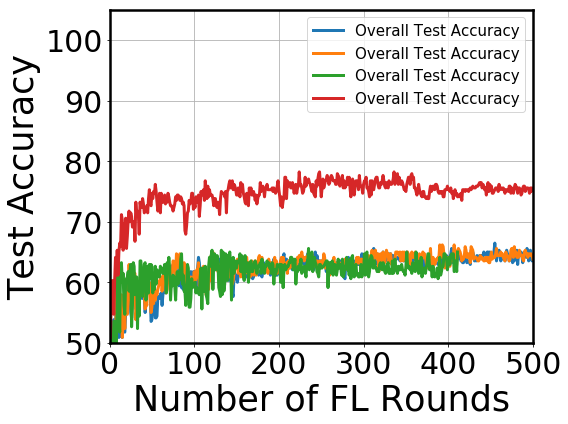

In [10]:

from matplotlib import colors as mcolors
from pylab import *
%matplotlib inline

import pandas as pd
#./outputs/tweet_hate_movie.txt_120_80_blackbox_100_0.05_2//stats.csv
#fname = '../../out/sent140-normal-trials-greek-backdoor-160b-40g-lr0.005/stats.csv'
#fname = '../../out/sent140-normal-trials-backdoor/stats.csv'
#fname = '../../out/sent140-normal-trials-greek-backdoor-160b-40g-lr-adapt/stats.csv'
#fname ="../../out/sent140-normal-trials-greek-director-backdoor-160b-40g-lr-adapt/stats.csv"
#fname = '../../out/sent140-normal-trials-greek-backdoor-160b-40g-lr-adapt/stats.csv '
#fname = 'pgd_100_0.05_2'
#d1 = '../../outputs/blackbox_100_0.05_2'
#d = '../../outputs/'+fname+'/'
fname1 = "../../out/sent140-normal-trials-data-th-natural-part-lr-0.1-bs-10/stats.csv"
fname2 = "../../out/sent140-normal-trials-data-th-natural-part-lr-0.05-bs-10/stats.csv"
fname3 = "../../out/sent140-normal-trials-data-th-natural-part-lr-0.05-bs-10-20w/stats.csv"
fname4 = "../../out/sent140-normal-trials-data-th/stats.csv"
df1 = pd.read_csv(fname1)
df2 = pd.read_csv(fname2)
df3 = pd.read_csv(fname3)
df4 = pd.read_csv(fname4)
print(df1.columns)
#df1['backdoor_acc_smooth'] = df1.globalModelBackdoorAcc.rolling(window=10, min_periods=1).mean()
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
xmin = df1['epoch'].min()
xmax = df1['epoch'].max()

#df1.plot(x='epoch', y='backdoor_acc_smooth', ax=ax, linewidth=3.0, label="Backdoor Accuracy")
#df1.plot(x='epoch', y='globalModelBackdoorAcc', ax=ax, linewidth=3.0, label="Backdoor Accuracy")
#df2.plot(x='fl_iter', y='backdoor_acc_smooth', ax=ax, linewidth=3.0, label="PGD attack")

#df1.plot(x='fl_iter', y='backdoor_acc_smooth', ax=ax, linewidth=3.0, label="PGD like Bbox")

# df3.plot(x='fl_iter', y='backdoor_acc_smooth', ax=ax, linewidth=3.0, label="PGD 1 in 10 projection")
df1.plot(x='epoch', y='globalModelAcc', ax=ax, linewidth=3.0, label="Overall Test Accuracy")
df2.plot(x='epoch', y='globalModelAcc', ax=ax, linewidth=3.0, label="Overall Test Accuracy")
df3.plot(x='epoch', y='globalModelAcc', ax=ax, linewidth=3.0, label="Overall Test Accuracy")
df4.plot(x='epoch', y='globalModelAcc', ax=ax, linewidth=3.0, label="Overall Test Accuracy")
#df2.plot(x='fl_iter', y='main_task_acc', ax=ax, linewidth=3.0, label="Blackbox Raw Task")
#df3.plot(x='fl_iter', y='main_task_acc', ax=ax, linewidth=3.0, label="PGD 1 in 10 Raw Task")

plt.xlabel("Number of FL Rounds",fontsize=35)
plt.ylabel("Test Accuracy",fontsize=35)
plt.xticks(size=30)
plt.yticks(size=30)
plt.ylim(50, 105)
plt.xticks(np.arange(xmin-1, xmax+1, 100))
#plt.xlim(xmin, xmax)
#plt.title("M=2 / Southwest")
# plt.title("Green Car attack BBox vs PGD")

legend_properties = {'size':15}
ax.xaxis.get_offset_text().set_fontsize(25)
ax.xaxis.get_offset_text().set_weight('bold')
ax.legend(prop=legend_properties)
plt.grid()

plt.tight_layout()
plt.savefig('accuracy_greek-director-backdoor-sent140.png', format='png', dpi=100, bbox_inches='tight', pad_inches=0.05)
# plt.savefig("greencar_pgd_vs_bbox.pdf", format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)
